In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
def CNN():
    # model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1,1), activation='relu', input_shape=(50,50,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Conv2D(16, (5, 5), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
# commented out block
# the code that will be in the run loop
'''
# buulding the model
model = CNN()
print(model.summary())

# fitting the model
model.fit(X_train_numpy, y_train, epochs=10, batch_size=200, verbose=1)

# evaluate the model
scores = model.evaluate(X_test_numpy, y_test, verbose=1)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))
'''

'\n# buulding the model\nmodel = CNN()\nprint(model.summary())\n\n# fitting the model\nmodel.fit(X_train_numpy, y_train, epochs=10, batch_size=200, verbose=1)\n\n# evaluate the model\nscores = model.evaluate(X_test_numpy, y_test, verbose=1)\nprint("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))\n'

In [6]:
import os
import shutil
import random

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt

# model information
model = CNN()
print(model.summary())

# actual coding loop (access all of the files)

BASE_DIR = 'kaggle/'

dir_names = os.listdir(BASE_DIR)
dir_names.remove('.DS_Store')

ind = 0

for dir in dir_names:
    print('iteration',ind)
    path = BASE_DIR + dir + '/'

    zero_path = path + '0/'
    one_path = path + '1/'

    zero_file_names = os.listdir(zero_path)
    one_file_names = os.listdir(one_path)

    zero_file_names = [(i, 0) for i in zero_file_names]
    one_file_names = [(i, 1) for i in one_file_names]

    all_file_names = random.shuffle(zero_file_names + one_file_names)

    normalization_layer = Rescaling(1./255)

    train_ds = image_dataset_from_directory(
        path,
        labels='inferred',
        color_mode='rgb',
        batch_size=32,
        image_size=(50,50),
        shuffle=True,
        validation_split=0.3,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

    # for val in train_ds:
    #     print(val)
    #     # im = array_to_img(val)
    #     # im.show()
    # print(train_ds)

    test_ds = image_dataset_from_directory(
        path,
        labels='inferred',
        color_mode='rgb',
        batch_size=32,
        image_size=(50,50),
        shuffle=True,
        validation_split=0.3,
        subset='validation',
        seed=123
    )

    test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

    # for val in test_ds:
    #     print(val)
    # print(test_ds)

    # fitting the model
    history = model.fit(train_ds, epochs=50, validation_data=test_ds, batch_size=10, verbose=0)

    # evaluate the model
    scores = model.evaluate(test_ds, verbose=0)
    print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

    # plt.plot(history.history['accuracy'])
    # plt.plot(history.history['val_accuracy'])
    # plt.title('model accuracy')
    # plt.legend(['train', 'val'], loc='upper left')
    # plt.show()

    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    # plt.title('model loss')
    # plt.legend(['train', 'val'], loc='upper left')
    # plt.show()

    if ind == 100:
        break
    else:
        ind+=1

    # X, Y = [], []
    # for name in all_file_names:
    #     x, y = name
    #     X.append(x)
    #     Y.append(y)

    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # # loading X_train images
    # X_train_numpy = []
    # for ind, i in enumerate(X_train):
    #     if os.path.isfile(zero_path + i):
    #         # this is the path
    #         im = load_img(zero_path + i)
    #     elif os.path.isfile(one_path + i):
    #         # this is path
    #         im = load_img(one_path + i)
    #     arr = img_to_array(im)
    #     X_train_numpy.append(arr)
    # X_train = np.array(X_train_numpy)
    # X_train_numpy = None
    # print(X_train.shape)

    # # loading X_test images
    # X_test_numpy = []
    # for ind, i in enumerate(X_test):
    #     if os.path.isfile(zero_path + i):
    #         # this is the path
    #         im = load_img(zero_path + i)
    #     elif os.path.isfile(one_path + i):
    #         # this is path
    #         im = load_img(one_path + i)
    #     arr = img_to_array(im)
    #     X_test_numpy.append(arr)
    # X_test = np.array(X_test_numpy)
    # X_test_numpy = None
    # print(X_test.shape)

    # # fitting the model
    # model.fit(X_train, Y_train, epochs=10, batch_size=200, verbose=1)

    # # evaluate the model
    # scores = model.evaluate(X_test, Y_test, verbose=1)
    # print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))
    # break



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 16)        6416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1296)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

Found 1127 files belonging to 2 classes.
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 1
[[0.06947723]] 0
[[0.06947723]] 1
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0
[[0.06947723]] 0


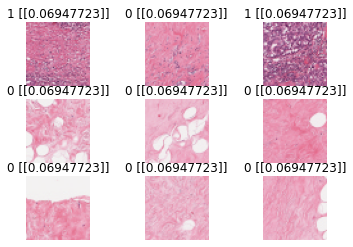

In [8]:
prediction_acc_ds = image_dataset_from_directory(
    'testing_images/',
    labels='inferred',
    color_mode='rgb',
    class_names=['0', '1'],
    batch_size=10,
    image_size=(50,50),
    shuffle=True,
    validation_split=0,
    seed=123
)

# normalization_layer = tf.keras.layers.Rescaling(1./255)
# prediction_acc_ds = prediction_acc_ds.map(lambda x, y: (normalization_layer(x), y))

# print(model.predict(prediction_acc_ds))

# im = load_img('kaggle/16531/0/16531_idx5_x151_y1151_class0.png')
# im = np.array(im)
# im = im.reshape(1, 50, 50, 3)
# print(model.predict(im))

# im = load_img('kaggle/16531/1/16531_idx5_x751_y1751_class1.png')
# im = np.array(im)
# im = im.reshape(1, 50, 50, 3)
# print(model.predict(im))

class_names = prediction_acc_ds.class_names

for images, labels in prediction_acc_ds.take(2):
    for i in range(9):
        im = images[i].numpy().astype("uint8").reshape(1, 50, 50, 3)
        pred = model.predict(im)
        print(pred, class_names[labels[i]])

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        t = str(class_names[labels[i]] + ' ' + str(pred))
        plt.title(t)
        plt.axis("off")

In [ ]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

print(X_train[0])
print(X_test[0])

Found 955 files belonging to 2 classes.
Using 286 files for validation.
[[[231 178 195]
  [230 191 209]
  [228 172 188]
  ...
  [234 192 207]
  [229 179 199]
  [227 174 195]]

 [[229 169 191]
  [229 179 195]
  [232 177 195]
  ...
  [234 203 219]
  [233 214 221]
  [237 213 225]]

 [[230 178 196]
  [227 171 188]
  [229 175 195]
  ...
  [232 191 204]
  [232 178 201]
  [230 188 202]]

 ...

 [[224 223 222]
  [223 222 222]
  [223 222 222]
  ...
  [230 190 207]
  [230 188 204]
  [234 184 203]]

 [[223 223 223]
  [223 222 223]
  [223 222 223]
  ...
  [229 183 197]
  [233 186 203]
  [231 187 201]]

 [[223 223 223]
  [223 222 223]
  [224 222 223]
  ...
  [207 178 204]
  [230 201 214]
  [233 204 218]]]
[[[235 196 209]
  [232 215 225]
  [232 210 217]
  ...
  [237 234 236]
  [240 237 239]
  [238 231 232]]

 [[224 173 193]
  [232 191 204]
  [230 207 219]
  ...
  [241 239 236]
  [237 232 235]
  [238 237 237]]

 [[241 224 230]
  [233 211 221]
  [230 188 206]
  ...
  [237 232 238]
  [242 240 239]
  [2

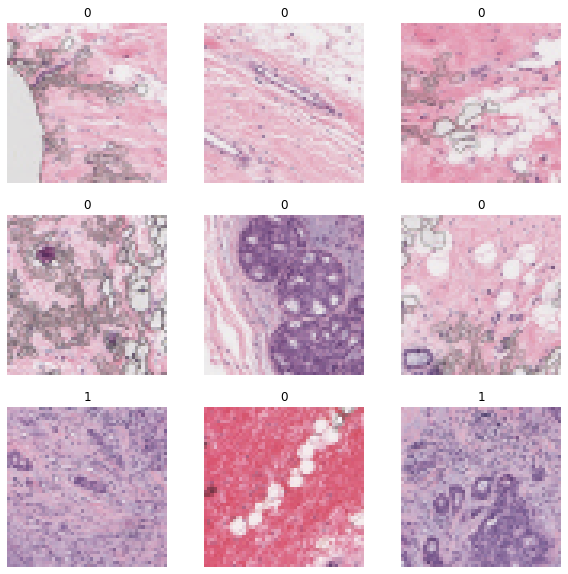

In [11]:
test_ds = image_dataset_from_directory(
    path,
    labels='inferred',
    color_mode='rgb',
    batch_size=10,
    image_size=(50,50),
    shuffle=True,
    validation_split=0.3,
    subset='validation',
    seed=123
)

class_names = test_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        print(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")